# LendingClub payback advisor
A project aiming to help LendingClub's investors predict whether the borrower will pay back their loan. By utilizing decision trees and random forests, we can help investors make the right decision when evaluating a candidate for their loan.

The dataset consists of the following features:
* `credit.policy`: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* `purpose`: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* `int.rate`: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* `installment`: The monthly installments owed by the borrower if the loan is funded.
* `log.annual.inc`: The natural log of the self-reported annual income of the borrower.
* `dti`: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* `fico`: The FICO credit score of the borrower.
* `days.with.cr.line`: The number of days the borrower has had a credit line.
* `revol.bal`: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* `revol.util`: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* `inq.last.6mths`: The borrower's number of inquiries by creditors in the last 6 months.
* `delinq.2yrs`: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* `pub.rec`: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* `not.fully.paid`: 1 if the borrower has not fully paid back their loan for any reason, and 0 otherwise.

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
loans = pd.read_csv('./data/loan_data.csv')

In [83]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [84]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [85]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory Data Analysis

Distribution of `FICO` scores based on `credit.policy`:

Text(0.5, 0, 'FICO')

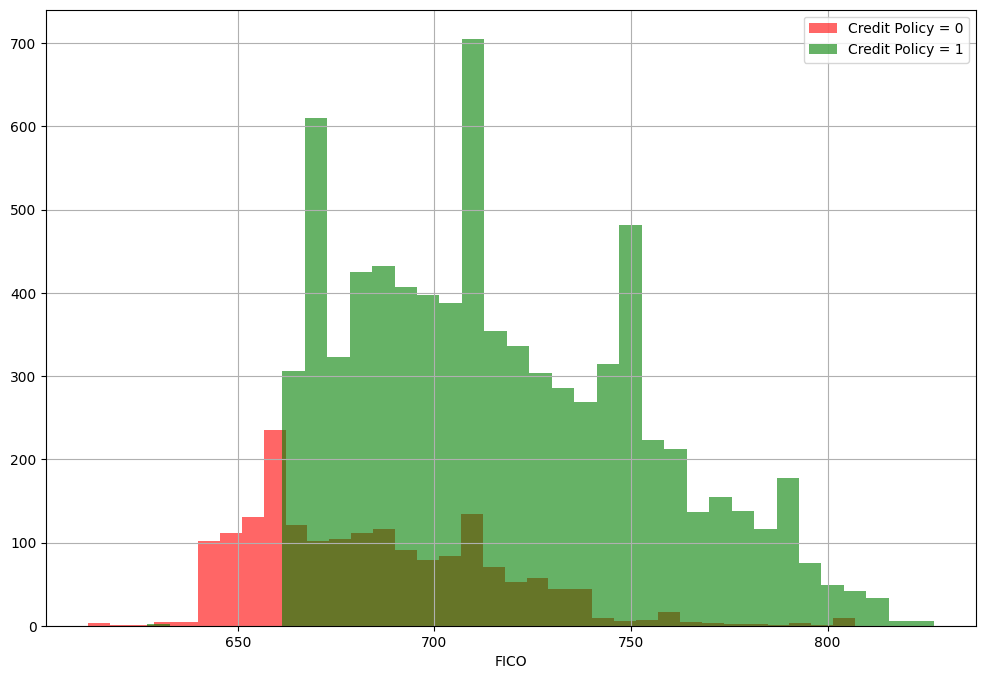

In [86]:
plt.figure(figsize=(12,8))
loans[loans['credit.policy'] == 0]['fico'].hist(bins=35, color='red', alpha=.6, label='Credit Policy = 0')
loans[loans['credit.policy'] == 1]['fico'].hist(bins=35, color='green', alpha=.6, label='Credit Policy = 1')
plt.legend()
plt.xlabel('FICO')

This shows that the higher the FICO score, the more likely the customer meets the credit underwriting criteria of LendingClub.com. Lenders with FICO score of less than 660 (with minor exceptions) do not meet the criteria.

Distribution of `FICO` scores based on `not.fully.paid`:

Text(0.5, 0, 'FICO')

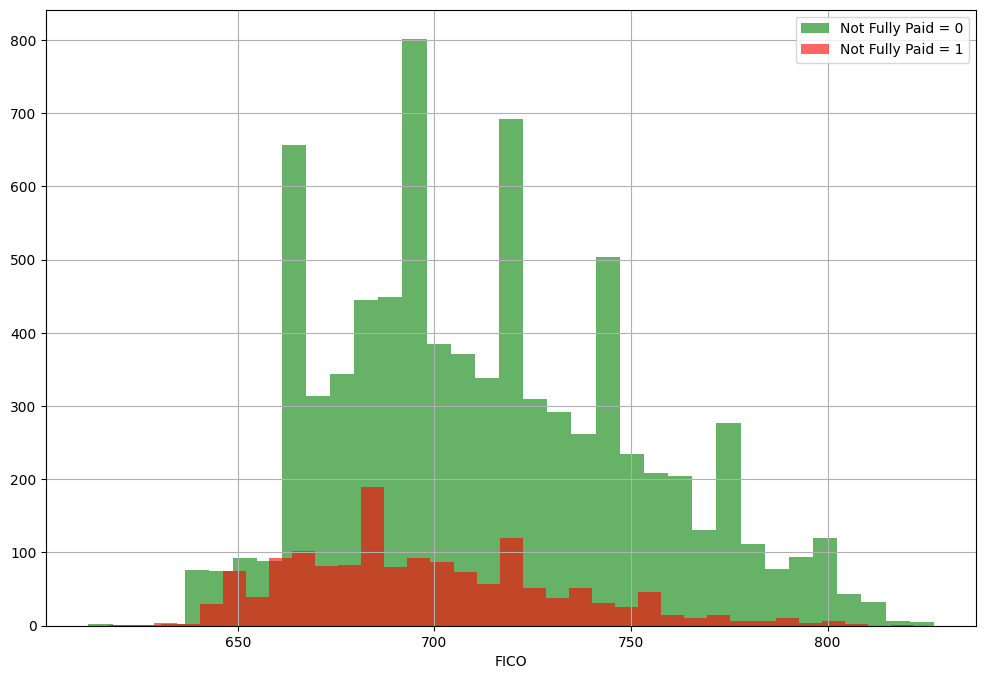

In [87]:
plt.figure(figsize=(12,8))
loans[loans['not.fully.paid'] == 0]['fico'].hist(bins=35, color='green', alpha=.6, label='Not Fully Paid = 0')
loans[loans['not.fully.paid'] == 1]['fico'].hist(bins=35, color='red', alpha=.6, label='Not Fully Paid = 1')
plt.legend()
plt.xlabel('FICO')

This shows that the distribution of FICO scores is similar for both classes. The spikes in the distribution are caused by the way FICO scores are calculated.

Number of loans by purpose, with the color hue defined by `not.fully.paid`:

<AxesSubplot:xlabel='purpose', ylabel='count'>

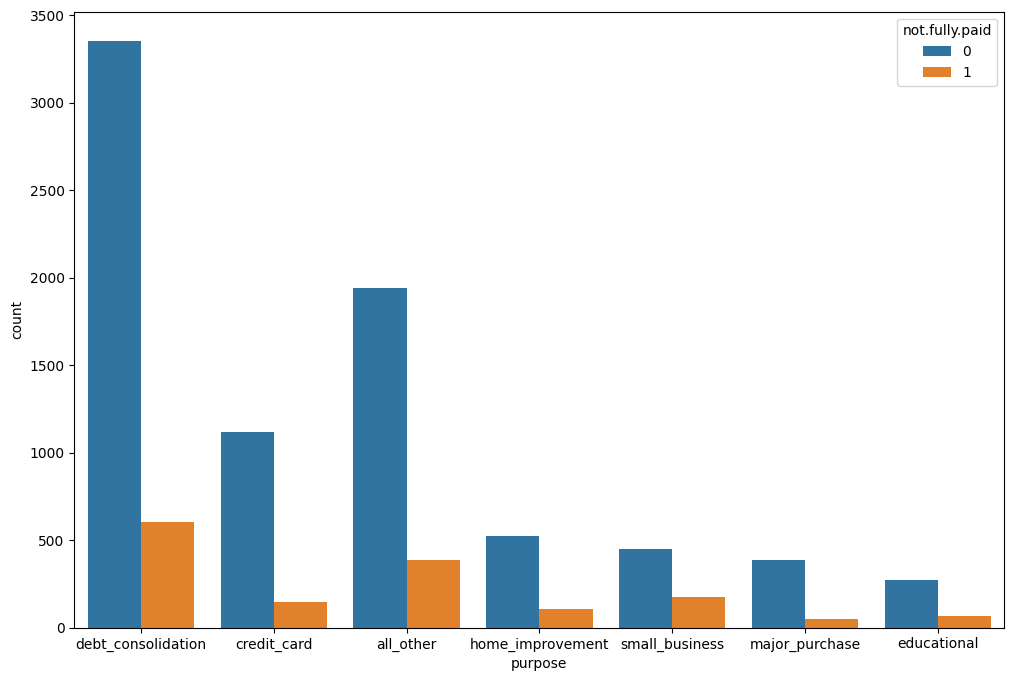

In [88]:
plt.figure(figsize=(12,8))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid')

This shows that the purpose of the loan is somewhat correlated (with some exceptions) with whether the borrower will pay back their loan, although we cannot say this is a strong correlation.

Scatter plot of `FICO` score vs. `int.rate`:

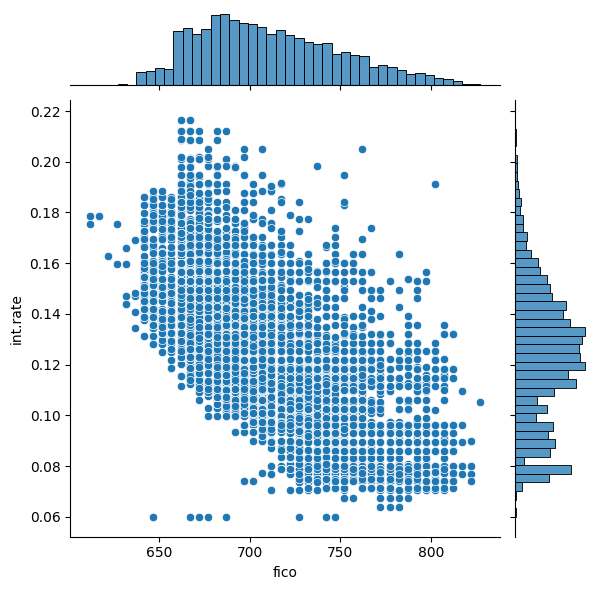

In [89]:
sns.jointplot(data=loans, x='fico', y='int.rate')

We can see that interest rates are much higher for borrowers with lower FICO scores, and tend to get lower as the FICO score increases. Both classes show a high correlation, with some notable outliers.

Two linear model plots of `FICO` vs. `int.rate` with `credit.policy` hue, both split by `not.fully.paid`:

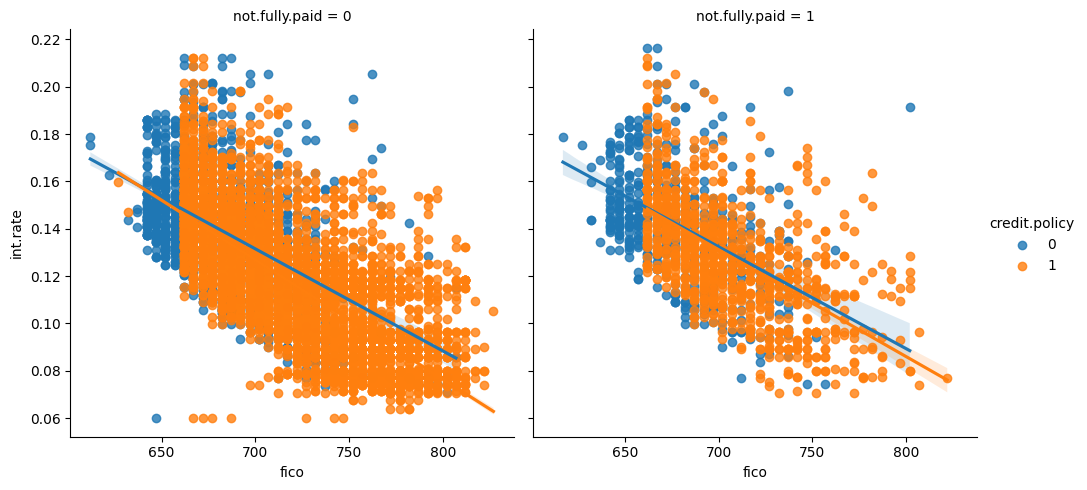

In [90]:
sns.lmplot(data=loans, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid')

Both model plots are very similar.

## Data Preparation

Let's one-hot encode the `purpose` column so we can use it in our model.

In [91]:
categorical_feats = ['purpose']

In [92]:
final_data = pd.get_dummies(data=loans, columns=categorical_feats, drop_first=True)

This is what the final dataframe looks like:

In [93]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Modeling

Now that we have the final dataframe ready, we can split our data into training and testing sets.

In [94]:
from sklearn.model_selection import train_test_split

For features, we will use all columns except for `not.fully.paid`. For the target, we will use the `not.fully.paid` column.

In [95]:
X = final_data.drop(columns=['not.fully.paid'])
y = final_data['not.fully.paid']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=8801)

In [97]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6704, 18), (2874, 18), (6704,), (2874,))

### Decision Tree

First, let's train a single decision tree.

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dtree = DecisionTreeClassifier()

In [100]:
dtree.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [101]:
dtree_pred = dtree.predict(X_test)

### Random Forest

Now, let's train a random forest model.

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc = RandomForestClassifier(n_estimators=600)

In [104]:
rfc.fit(X=X_train, y=y_train)

RandomForestClassifier(n_estimators=600)

In [105]:
rfc_pred = rfc.predict(X_test)

## Evaluation

For evaluating both models, we will use a confusion matrix and classification report.

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [107]:
target_labels = ['Fully Paid', 'Not Fully Paid']

In [108]:
print('### Decision Tree:')
print(classification_report(y_test, dtree_pred, target_names=target_labels))
print('### Random Forest:')
print(classification_report(y_test, rfc_pred, target_names=target_labels))

### Decision Tree:
                precision    recall  f1-score   support

    Fully Paid       0.85      0.83      0.84      2411
Not Fully Paid       0.23      0.25      0.24       463

      accuracy                           0.74      2874
     macro avg       0.54      0.54      0.54      2874
  weighted avg       0.75      0.74      0.75      2874

### Random Forest:
                precision    recall  f1-score   support

    Fully Paid       0.84      1.00      0.91      2411
Not Fully Paid       0.36      0.01      0.02       463

      accuracy                           0.84      2874
     macro avg       0.60      0.50      0.47      2874
  weighted avg       0.76      0.84      0.77      2874



In [109]:
print(f'All test data: {len(y_test)}\n')

All test data: 2874



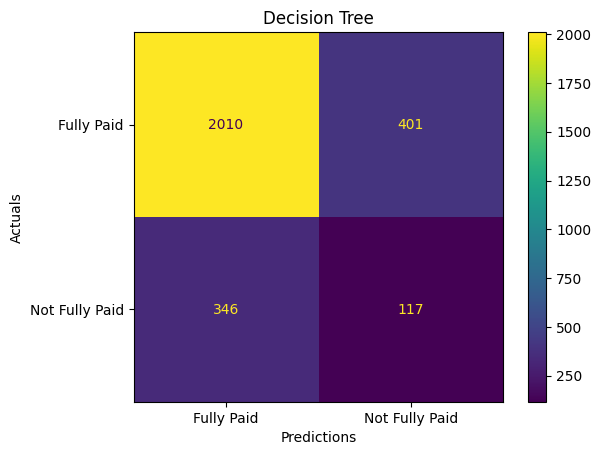

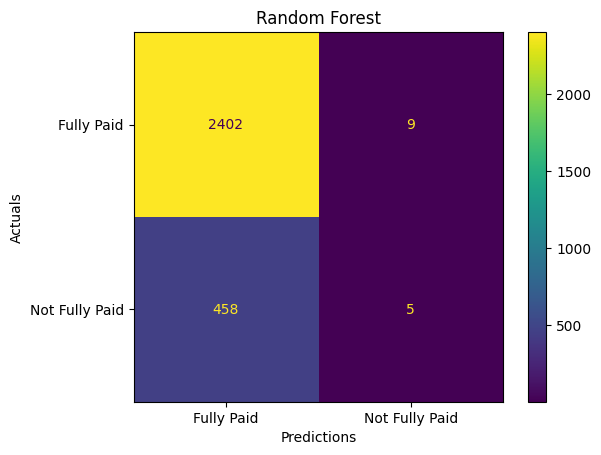

In [110]:
dtree_cm = confusion_matrix(y_test, dtree_pred)
dtree_cm_disp = ConfusionMatrixDisplay(dtree_cm, display_labels=target_labels)
dtree_cm_disp.plot()
dtree_cm_disp.ax_.set_title('Decision Tree')
dtree_cm_disp.ax_.set_xlabel('Predictions')
dtree_cm_disp.ax_.set_ylabel('Actuals')
plt.show()

rfc_cm = confusion_matrix(y_test, rfc_pred)
rfc_cm_disp = ConfusionMatrixDisplay(rfc_cm, display_labels=target_labels)
rfc_cm_disp.plot()
rfc_cm_disp.ax_.set_title('Random Forest')
rfc_cm_disp.ax_.set_xlabel('Predictions')
rfc_cm_disp.ax_.set_ylabel('Actuals')
plt.show()

As we can tell by the confusion matrix and classification report, the overall performance of the random forest model is better than that of the single decision tree. The random forest model was able to correctly predict 84% of the `not.fully.paid` class, while the single decision tree was only able to correctly predict 74% of the `not.fully.paid` class.

**Looking just at the acurracy can sometimes be misleading.** Taking into account the needs of the LendingClub.com, we can imagine that **minimising False Negatives is much more important than minimising False Positives**<sup>*</sup>. In other words, we want to minimise the number of people who are predicted to pay back their loan, but actually don't. This is because we want to minimise the risk of losing money. On the other hand, we can afford to have a few more people who are predicted to not pay back their loan, but actually do. This is because we can afford to lose a few more dollars by lending money to people who actually pay back their loan.

Having the above in mind, when evaluating models, we should pay more attention to the amount of False Negatives and which model has the least amount of them. In this case, the random forest model has 458 False Negatives, while the single decision tree has 346 False Negatives, which means **a single decision tree model predicted 109 less borrowers, who were predicted to pay back, but actually didn't**. This means that the single decision tree model is better at predicting people who will not pay back their loan.

The random forest model predicts that only 14 borrowers will not fully pay back their loan, while in reality 463 borrowers didn't pay back their loan. These are definitely not good predictions. On the other hand, the single decision tree predicted that 518 borrowers will not fully pay back their loan, while in reality 463 borrowers didn't pay back their loan. These are much better predictions.

**To sum up, the single decision tree is a better choice in this case.**

<sup>*</sup> Note, False Positives are people who are predicted to not pay back their loan, but actually do. False Negatives are people who are predicted to pay back their loan, but actually don't.